# Evaluating dipolar couplings from a covalently bonded geometry

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import DC_Geometry

In [2]:
plt.rcParams['figure.figsize'] = [9,6]

In [3]:
# Function to plot DC surfaces
def Setup_Plot(Rho,Tau,Grid,cbar_label='DC / $K_{DC}$'):
    plt.contourf(Rho,Tau,Grid)
    cbar = plt.colorbar()
    cbar.set_label(cbar_label,fontsize=14)#, rotation=270)
    plt.xlabel("Rotational angle, Rho (rad)",fontsize=14)
    plt.ylabel("Til angle, Tau (rad)",fontsize=14)

    xtick_pos= np.linspace(-np.pi,np.pi,5)
    xlabels = ['$-\pi$','$-\pi/2$','0', '$\pi/2$', '$\pi$']
    plt.xticks(xtick_pos, xlabels,fontsize=12)

    ytick_pos= np.linspace(0,np.pi,5)
    ylabels = ['0', '$\pi/4$', '$\pi/2$', '$3\pi/4$', '$\pi$']
    plt.yticks(ytick_pos, ylabels,fontsize=12)
    
    plt.tight_layout(rect=[0, 0.03, 0.85, 0.93])
    return

## Lipid tail -CH<sub>2</sub> dipolar coupling as a function of the carbon atoms in the acyl chain

The dipolar coupling (DC) from the C-H bonds in the acyl groups of the lipid can be calculated according to the positions of the carbon atoms in the chain:

Two vectors, **u** and **v**, are defined connecting the central carbon to the preceding and following carbons. These two vectors then define two angles: the tilt of **u** with respect to the external magnetic field, and the rotational angle of **v** (see README for details).

This allows the calculation to be performed in molecular structures without explicit hydrogen atoms.

Bypassing the hydrogen atoms in the calculation also results in a more robust structural restraint. By applying the forces to the heavy atoms, the molecular geometry is directly influenced. In contrast, the carbon-hydrogen bond can be easily distorted, and forces applied to it often do not translate into a modification of the overall geometry.

In [4]:
# sp2 CH2 geometry definition: C-CH2-C

# The overall geometry is defined by 5 atoms - the three carbons and the two hydrogens bonded to the middle carbon
sp2_xyz = np.zeros((5,3))
sp2_Natoms = sp2_xyz.shape[0]
sp2_bonds = np.zeros((sp2_Natoms,sp2_Natoms),dtype=int)

# The covalent bond network is specified manually
sp2_bonds[1,0] = -1
sp2_bonds[2,1] = 1
sp2_bonds[3,1] = 1
sp2_bonds[4,1] = 1

# These are the indices of the bonds that define the dipolar coupling interaction with the magnetic field
dcbonds = [1,2]

# These are the new bonds onto which we wish to transfer the DC calculation - the Carbon-Carbon bonds in our case
tiltID = 0
azID = 3

# Instantiate the geometry
sp2_ch2 = DC_Geometry.Geometry("sp2_ch2",sp2_xyz,sp2_bonds,dcbonds,tiltID,azID)


In [5]:
# The geometry can be built from a coordinate file (.gro format)

# The names of the atoms that define the geometry must be specified
# In the case of lipids, many atoms with different names are in a sp2 CH2 geometry - we will specify them all
# Using an example .gro file with POPC molecules

atnames = []

for i in range(1,8):
    atnames.append(["C2"+str(i),"C2"+str(i+1),"H"+str(i+1)+"R","H"+str(i+1)+"S","C2"+str(i+2)])
for i in range(10,17):
    atnames.append(["C2"+str(i),"C2"+str(i+1),"H"+str(i+1)+"R","H"+str(i+1)+"S","C2"+str(i+2)])
for i in range(1,15):
    atnames.append(["C3"+str(i),"C3"+str(i+1),"H"+str(i+1)+"X","H"+str(i+1)+"Y","C3"+str(i+2)])

sp2_ch2 = sp2_ch2.buildFromGro('POPC.gro',atnames)


Building the geometry sp2_ch2 from GRO file POPC.gro ... 95 %             
/*** Constructed the geometry sp2_ch2 from the GRO file POPC.gro ***/

Pseudo order parameter of bonds in the GRO file:
 [1.         0.97604879 0.97612309 0.99786691] 



### Evaluating the surface of the DC as a function of the two newly defined angles 

The DC is calculated on a grid as a function of the two angles defined by **u** and **v**

The derivative of the DC as a function of these angles is also computed so that restraining forces can be applied 

In [6]:
# Calculate the DC
sp2_ch2 = sp2_ch2.explore_tiltaz_surface()

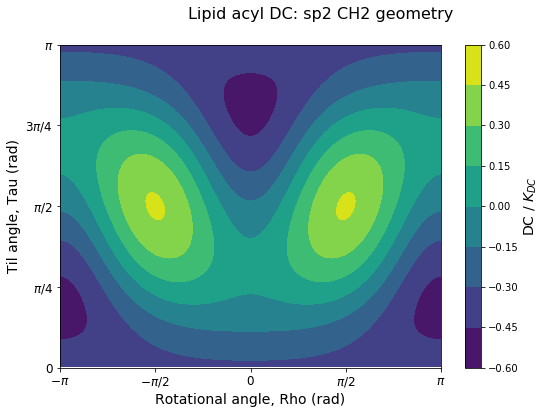

In [7]:
Setup_Plot(sp2_ch2.atan2rho,sp2_ch2.tauANG,sp2_ch2.DC_surface)
plt.suptitle("Lipid acyl DC: sp2 CH2 geometry",fontsize=16)
plt.savefig("Surfaces/Lipid_sp2_CH2_DC.png")
plt.show()

In [8]:
# Calculate the derivative of the DC with respect to both angles
sp2_ch2 = sp2_ch2.eval_grad()

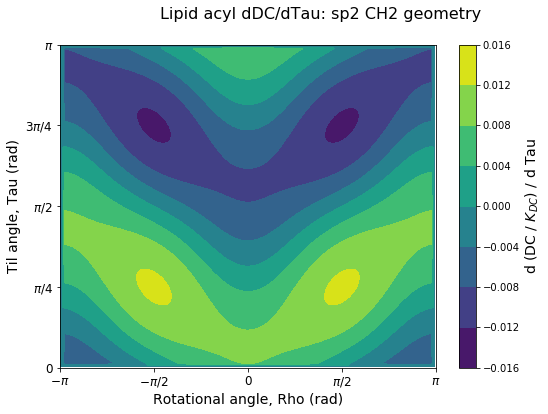

In [9]:
# Plot derivative with respect to Tau
Setup_Plot(sp2_ch2.atan2rho,sp2_ch2.tauANG,sp2_ch2.DCGrad_TAU,cbar_label='d (DC / $K_{DC}$) / d Tau')
plt.suptitle("Lipid acyl dDC/dTau: sp2 CH2 geometry",fontsize=16)
plt.savefig("Surfaces/Lipid_sp2_CH2_dTau.png")
plt.show()

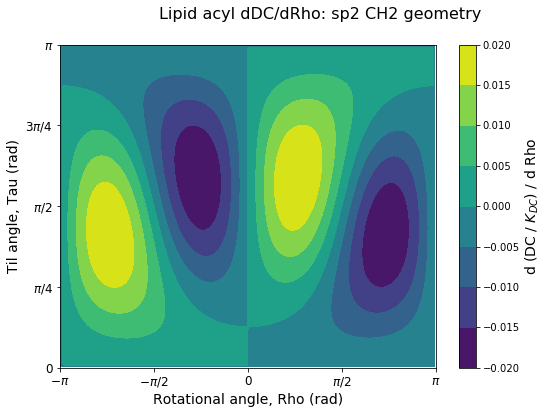

In [10]:
# Plot derivative with respect to Rho
Setup_Plot(sp2_ch2.atan2rho,sp2_ch2.tauANG,sp2_ch2.DCGrad_RHO,cbar_label='d (DC / $K_{DC}$) / d Rho')
plt.suptitle("Lipid acyl dDC/dRho: sp2 CH2 geometry",fontsize=16)
plt.savefig("Surfaces/Lipid_sp2_CH2_dRho.png")
plt.show()

## Protein N-H dipolar coupling calculated from carbonyl C and C&#945;

A geometry can also be built from ideal coordinates, e.g. in the case of the peptide geometry, which is well studied and defined - the DC from the N-H bond can be transferred to its bonded heavy atoms

In [11]:
# These coordinates correspond to an ideal peptide bond
Ideal_XYZ = np.array([[  6.37251315e-01,  -1.19035705e+00,   1.64745756e-13],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  6.88360678e-01,   1.28581503e+00,  -1.78432929e-13],
       [ -9.82610653e-01,   2.10918243e-02,  -9.19637340e-04]])

# Describing the bonding information and build the Geometry

nh_bonds = np.zeros((4,4),dtype=int)

nh_bonds[1,0] = -1
nh_bonds[2,1] = 1
nh_bonds[3,1] = 1

dcbonds = [1]

tiltID = 0
azID = 2

peptide_nh = DC_Geometry.Geometry("peptide_nh",Ideal_XYZ,nh_bonds,dcbonds,tiltID,azID)

In [12]:
# Calculate the DC and its derivatives
peptide_nh = peptide_nh.explore_tiltaz_surface()
peptide_nh = peptide_nh.eval_grad()

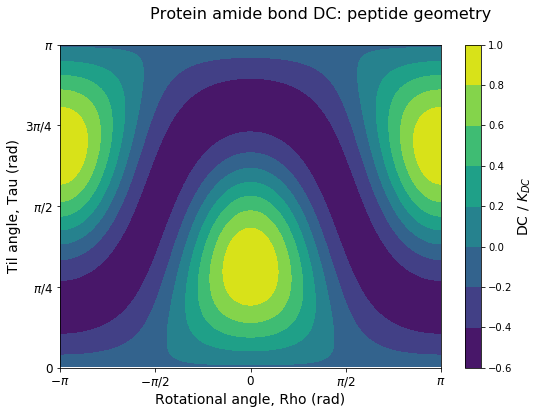

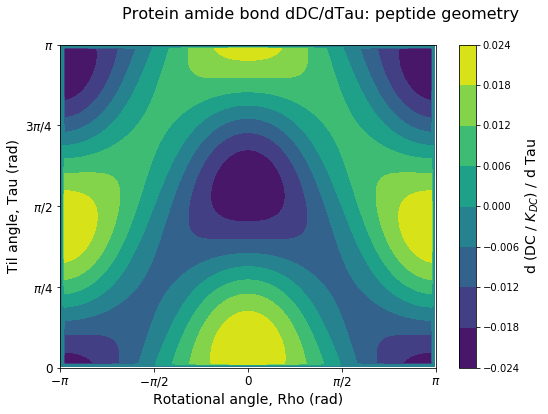

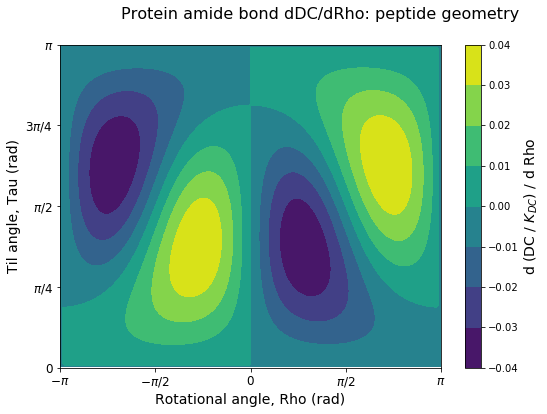

In [13]:
# Plot them!
Setup_Plot(peptide_nh.atan2rho,peptide_nh.tauANG,peptide_nh.DC_surface)
plt.suptitle("Protein amide bond DC: peptide geometry",fontsize=16)
plt.savefig("Surfaces/Protein_NH_DC.png")
plt.show()

print('\n\n')

Setup_Plot(peptide_nh.atan2rho,peptide_nh.tauANG,peptide_nh.DCGrad_TAU,cbar_label='d (DC / $K_{DC}$) / d Tau')
plt.suptitle("Protein amide bond dDC/dTau: peptide geometry",fontsize=16)
plt.savefig("Surfaces/Protein_NH_dTau.png")
plt.show()

print('\n\n')

Setup_Plot(peptide_nh.atan2rho,peptide_nh.tauANG,peptide_nh.DCGrad_RHO,cbar_label='d (DC / $K_{DC}$) / d Rho')
plt.suptitle("Protein amide bond dDC/dRho: peptide geometry",fontsize=16)
plt.savefig("Surfaces/Protein_NH_dRho.png")
plt.show()